## **Бутстреппинг. Бэггинг**

**Задание 2.7**

Объёмная и содержательная практика у нас ещё впереди, но в качестве разминки давайте поработаем с уже известным вам датасетом о вине.

Ранее вы обучали на данных только один алгоритм, а теперь мы попробуем сравнить несколько.

Подготовьте данные к классификации. Условно разделите вино на хорошее и плохое. Хорошим вином будем называть то, параметр quality которого — 6 и более.
Сравните несколько методов классификации: логистическую регрессию, дерево решений и бэггинг. Это позволит вам увидеть, как меняется качество в зависимости от выбора того или иного алгоритма.
Разделите выборку на обучающую и тестовую в соотношении 70/30, в качестве значения параметра random_state возьмите число 42.
Для начала обучите два классификатора: логистическую регрессию (с параметрами по умолчанию) и дерево решений (random_state = 42, максимальная глубина — 10).

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree, ensemble, linear_model
from sklearn import model_selection
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [56]:
data = pd.read_csv('data\wineQualityReds.zip', index_col=0)


In [57]:
display(data.head())
data.shape
data.quality.value_counts()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

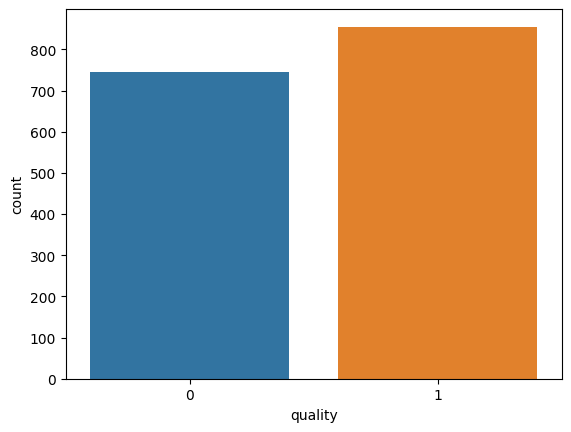

In [58]:
data.quality = data.quality.apply(lambda x: 1 if x >5 else 0)
data.quality.value_counts()

sns.countplot(data=data, x='quality');

In [63]:
# Разделяем факторы и целевую переменную
X = data.drop('quality', axis=1)
y = data.quality

# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1119, 11)
Test shape: (480, 11)


In [64]:
# Логистическая регрессия

lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
print('F1 {:.3f}'.format(metrics.f1_score(y_test, y_lr)))

F1 0.753


In [65]:
# Дерево решений
dt = tree.DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_dt = dt.predict(X_test)

print('F1 {:.3f}'.format(metrics.f1_score(y_test, y_dt)))


F1 0.793


In [66]:
# Бэггинг
bg = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth = 10, 
                                                                           random_state=42
                                                                           ),
                                n_estimators=1500,
                                random_state=42
).fit(X_train, y_train)

y_bg = bg.predict(X_test)

print('F1 {:.3f}'.format(metrics.f1_score(y_test, y_bg)))

F1 0.818


## **Случайный лес**

**Задание 3.4**

In [88]:
data_bh = pd.read_csv('data/boston__1_.zip', decimal=',')

In [89]:
data_bh.head()

,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [91]:
# 1. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70/30, при разбиении задайте параметр random_state = 13.
# Какое получилось среднее значение медианных цен на обучающей выборке? 

X_3_4 = data_bh.drop('target', axis=1)
y_3_4 = data_bh.target

# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_3_4, y_3_4, test_size=0.3, random_state=13)

print(f'Среднее значение медианных цен на обучающей выборке {round(y_train.mean(), 2)}')

Среднее значение медианных цен на обучающей выборке 22.77


In [92]:
# 2. Обучите линейную регрессию с параметрами по умолчанию. В качестве ответа введите ошибку MAE на тестовой выборке.

lin = linear_model.LinearRegression()
lin.fit(X_train, y_train)
y_lin = lin.predict(X_test)

print('MAE {:.2F}'.format(metrics.mean_absolute_error(y_test, y_lin)))

MAE 3.72


In [94]:
# Обучите решающее дерево с параметрами по умолчанию и аргументом random_state = 13.

dtr = tree.DecisionTreeRegressor(random_state=13)
dtr.fit(X_train, y_train)

y_train_dtr = dtr.predict(X_train)
y_test_dtr = dtr.predict(X_test)

print('MAE train {:.2f}\nMAE test {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_dtr), metrics.mean_absolute_error(y_test, y_test_dtr)))

MAE train 0.00
MAE test 2.84


In [98]:
# 4. Обучите четыре случайных леса с числом деревьев 3, 10, 100, 500 и параметром random_state = 13.
maes = []
quantity = [3, 10, 100, 500]
for cnt in quantity:
    model = ensemble.RandomForestRegressor(n_estimators=cnt, random_state = 13).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    maes.append(metrics.mean_absolute_error(y_test, y_pred))

print(f'Минимальная ошибка - {round(min(maes), 2)}')

Минимальная ошибка - 2.24


## **Бустниг**